## Final Project Submission

Please fill out:
* Student name: Benson Kamau
* Student pace: full time
* Scheduled project review date/time: N/A
* Instructor name: Nikita
* Blog post URL: N/A


In [1]:
# Your code here - remember to use markdown cells for comments as well!


Import python libraries for analysis:
1.Matplotlib and matplotlib inline to create visuals
2.Numpy to assist in visual creation
3.Seaborn to assist in visual creation
4.Sqlite3 to assist with sql-style syntax on panel dataframes
5.zipfile to assist with opening zipped packages
6.Pandas to read, manipulate and analyze data.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sqlite3
import zipfile
from pandasql import sqldf 

Loading Datasets

In [3]:
bom_movie = pd.read_csv('bom.movie_gross.csv')
bom_movie.head(10)



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:
#check the data info
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#check for missing data 
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Lets try getting the Return on investment(ROI), we will load our budget data before analysing.

In [6]:
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [7]:
#making movie title as index
budgets1 = budgets.set_index("movie")
budgets1.head(10)


,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015","$306,000,000","$936,662,225","$2,053,311,220"
Avengers: Infinity War,7,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007","$300,000,000","$309,420,425","$963,420,425"
Justice League,9,"Nov 17, 2017","$300,000,000","$229,024,295","$655,945,209"


In [8]:
# get the structure of budgets1(column names and the data types)
budgets1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


We need to convert the dataframe to numeric values that allows us to do mathematical computations. We will also need to replace the $ and , in our data.

In [9]:
# Convert the production_budget,domestic_gross and worldwide_gross columns to numeric type
budgets1['domestic_gross'] = budgets1['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('int64')
budgets1['worldwide_gross'] = budgets1['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype('int64')
budgets1['production_budget'] = budgets1['production_budget'].str.replace('$', '').str.replace(',', '').astype('int64')
budgets1.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747


In [10]:
# Calculate the net profit and profit margin for each movie
budgets1['net_profit'] = budgets1['worldwide_gross'] - budgets1['production_budget']
budgets1['profit_margin'] = round(budgets1['net_profit'] / budgets1['worldwide_gross'], 4)

In [11]:
#Print the results
budgets1.head(10)

,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
movie,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,0.8469
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875,635063875,0.6073
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350,-200237650,-1.3370
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,1072413963,0.7644
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747,999721747,0.7593
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,0.8510
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,0.8535
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007",300000000,309420425,963420425,663420425,0.6886
Justice League,9,"Nov 17, 2017",300000000,229024295,655945209,355945209,0.5426


In [12]:
# replace the negative infinity values with Not a Number
budgets1.profit_margin.replace(-np.inf, np.nan, inplace=True)
budgets1.dropna(inplace=True)
budgets1.reset_index()
budgets1.head(10) 

,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
movie,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,0.8469
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875,635063875,0.6073
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350,-200237650,-1.3370
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,1072413963,0.7644
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747,999721747,0.7593
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,0.8510
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,0.8535
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007",300000000,309420425,963420425,663420425,0.6886
Justice League,9,"Nov 17, 2017",300000000,229024295,655945209,355945209,0.5426


In [13]:
sorted_movies = budgets1.sort_values(by = 'net_profit', ascending=False)
sorted_movies.reset_index
sorted_movies.head(20) 

,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
movie,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,0.8469
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395,0.9094
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,0.8535
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,0.8510
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,0.8696
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,1328722794,0.8749
The Avengers,27,"May 4, 2012",225000000,623279547,1517935897,1292935897,0.8518
Harry Potter and the Deathly Hallows: Part II,61,"Jul 15, 2011",125000000,381193157,1341693157,1216693157,0.9068
Black Panther,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224,0.8517


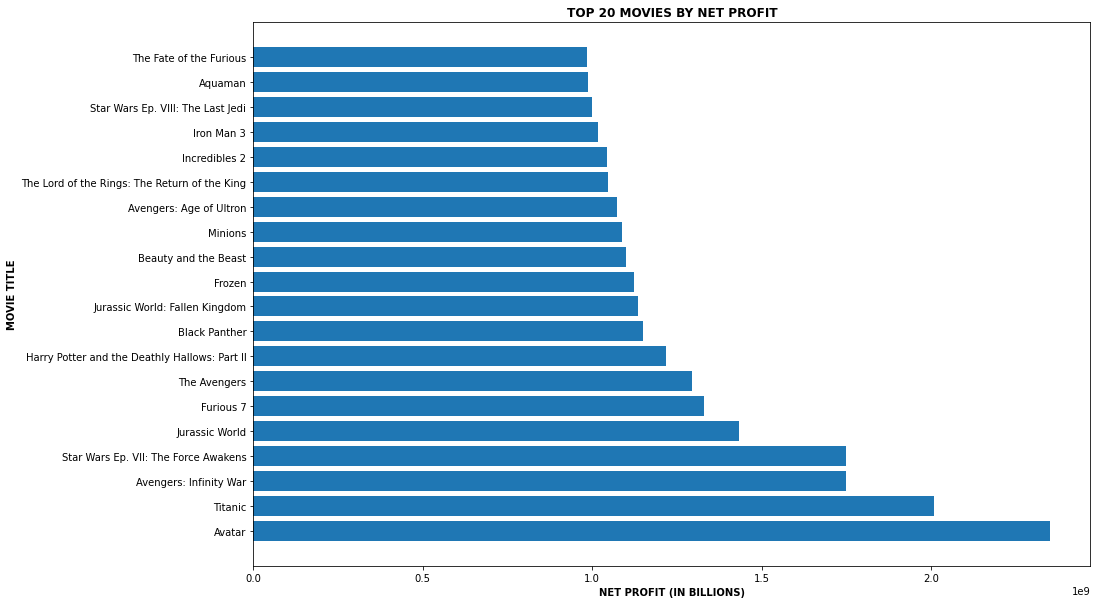

In [14]:
# Create bar chart of top 20 movies by net profit
plt.figure(figsize=(15, 10))
plt.barh(sorted_movies.index[:20], sorted_movies['net_profit'][:20])
plt.title('Top 20 Movies by Net Profit'.upper(), fontweight='bold')
plt.xlabel('Net Profit (in billions)'.upper(), fontweight='bold')
plt.ylabel('Movie Title'.upper(), fontweight='bold')
plt.show()

Avatar,Titanit and Avengers were the top three movies that did well. Let's investigate why they did well? Is there are correlation of the investment to the profit?

In [15]:
# calculate the Pearson correlation coefficient between budget and net profit
movie_budget = budgets1['production_budget']
net_profit = budgets1['net_profit']
corr = np.corrcoef(movie_budget, net_profit)[0, 1] 


In [16]:
# print the correlation coefficient
print('The Pearson correlation coefficient between budget and net profit is:', corr)


The Pearson correlation coefficient between budget and net profit is: 0.6068652923681526


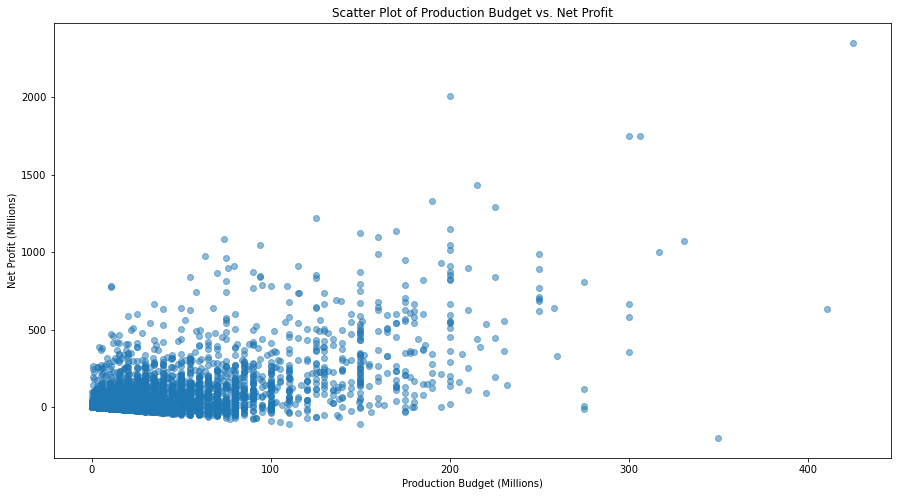

In [17]:
plt.figure(figsize=(15, 8))
plt.scatter(x=budgets1['production_budget']/1000000, y=budgets1['net_profit']/1000000, alpha=0.5)
plt.xlabel('Production Budget (Millions)')
plt.ylabel('Net Profit (Millions)')
plt.title('Scatter Plot of Production Budget vs. Net Profit')
plt.show() 



A Pearson correlation coefficient of 0.61 suggests a somewhat good relationship between the production budget and net profits. This indicates that when the manufacturing budget increases, so does net profit. However, correlation does not imply causation, thus we cannot state with certainty that raising the production budget will always result in a higher net profit.However, by analyzing the profit margins of successful films, we can establish the profit margin to aim for. This is accomplished by assessing the profit margin for movies that have made a profit and comparing it to the general median profit margin as well as the median profit margin for the top 20 movies with the highest net profit. 

Lets load the data base file 

In [19]:
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')

In [22]:
#open up a connection
conn = sqlite3.connect('zippedData/im.db')
#initialize connection
cursor = conn.cursor()

In [23]:
# Get the tables in the data base file
df1 =pd.read_sql( """
SELECT name 
FROM sqlite_master 
WHERE type ='table' AND name NOT LIKE 'sqlite_%';
""", conn)

df1

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [24]:
#previewing movie_ratings table
q1 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
#previewing movie_basics table
q2 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
#previewing the persons table
q3 = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
q3.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [27]:
#previewing the directors table
q = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)
q.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Merge movie_basics, persons, directors and movie_ratings


In [30]:
df2 = pd.read_sql ("""
SELECT *
       FROM movie_basics AS mb
       JOIN movie_ratings AS mr
       USING (movie_id)
      
;""",conn)
df2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [31]:
# getting info about df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [32]:
df2.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Handling the missing data for the runtime_minutes and genres tables.

In [34]:
median_runtime = df2['runtime_minutes'].median()
df2['runtime_minutes'].fillna(median_runtime, inplace=True)

# Replace NaNs in 'genres' column with a placeholder string
df2['genres'].fillna('Unknown', inplace=True)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
